In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Student Stress Factors (2).csv')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   Kindly Rate your Sleep Quality 😴                                  520 non-null    int64
 1   How many times a week do you suffer headaches 🤕?                  520 non-null    int64
 2   How would you rate you academic performance 👩‍🎓?                  520 non-null    int64
 3   how would you rate your study load?                               520 non-null    int64
 4   How many times a week you practice extracurricular activities 🎾?  520 non-null    int64
 5   How would you rate your stress levels?                            520 non-null    int64
dtypes: int64(6)
memory usage: 24.5 KB


,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,3.125000,2.182692,3.326923,2.750000,2.682692,2.875000
std,1.099023,1.247459,1.061158,1.372381,1.470745,1.357825
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,3.000000,2.000000,3.000000,2.500000,3.000000,3.000000
75%,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [49]:
# Memeriksa apakah ada nilai dalam dataset yang "kosong" atau "NaN"
print(data.isnull().values.any())

False


In [50]:
# Apabila ingin melakukan pemeriksaan data isnull perkolom gunakan script berikut:
print(data.isnull().sum())

Kindly Rate your Sleep Quality 😴                                    0
How many times a week do you suffer headaches 🤕?                    0
How would you rate you academic performance 👩‍🎓?                    0
how would you rate your study load?                                 0
How many times a week you practice extracurricular activities 🎾?    0
How would you rate your stress levels?                              0
dtype: int64


In [52]:
# 3. Data Preparation CRISP-DM
# Memilih fitur (features) dan target
features = ['Kindly Rate your Sleep Quality 😴', 'How many times a week do you suffer headaches 🤕?', 'How would you rate you academic performance 👩‍🎓?', 'how would you rate your study load?', 'How many times a week you practice extracurricular activities 🎾?']
X = data[features]
y = data['How would you rate your stress levels?']

In [53]:
# 3. Data Preparation CRISP-DM
#Diskritisasi target menjadi beberapa kelas.
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
y_binned = discretizer.fit_transform(y.values.reshape(-1, 1)).flatten()
print("Data target setelah diskritisasi:")

#untuk mengetahui nilai nilai uniqe hasil diskrit
unique_values = set(y_binned)
print("Nilai unik dari y_binned:", unique_values)

#untuk mengetahui nilai detail hasil diskrit
for bin_idx in range(4):
  bin_mask = (y_binned == bin_idx)
  print(f"Bin {bin_idx}: {y[bin_mask]}")

Data target setelah diskritisasi:
Nilai unik dari y_binned: {np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0)}
Bin 0: 5      1
7      1
8      1
11     1
13     1
      ..
489    1
499    1
505    1
510    1
515    1
Name: How would you rate your stress levels?, Length: 110, dtype: int64
Bin 1: 1      2
9      2
14     2
17     2
20     2
      ..
497    2
502    2
509    2
516    2
517    2
Name: How would you rate your stress levels?, Length: 105, dtype: int64
Bin 2: 0      3
3      3
4      3
12     3
18     3
      ..
503    3
506    3
508    3
511    3
514    3
Name: How would you rate your stress levels?, Length: 125, dtype: int64
Bin 3: 2      4
6      5
10     4
15     4
16     4
      ..
507    5
512    5
513    4
518    5
519    4
Name: How would you rate your stress levels?, Length: 180, dtype: int64


In [54]:
# 3. Data Preparation CRISP-DM
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (416, 5)
Shape of X_test: (104, 5)
Shape of Y_train: (416,)
Shape of Y_test: (104,)


In [55]:
# 3. Data Preparation Lanjutan CRISP-DM
# Menghitung baseline performance (prediksi kelas mayoritas)
# Mencari kelas mayoritas
y_train = y_train.astype(int)
#konversi nilai data agar dapat dihitung kelas dengan populasi terbanyak
majority_class = np.bincount(y_train).argmax()
# Prediksi kelas mayoritas pada testing set
y_pred_baseline = np.full_like(y_test, majority_class)

print("Baseline Predicted stress levels:")
print(y_pred_baseline)

Baseline Predicted stress levels:
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3.]


In [56]:
# 4. Modeling CRISP-DM
# Inisialisasi model
model = DecisionTreeClassifier(random_state=42)
# Latih model menggunakan data latih
model.fit(X_train, y_train)
# Buat prediksi menggunakan data uji
y_pred = model.predict(X_test)

print("Predicted stress levels:")
print(y_pred)

Predicted stress levels:
[2 1 3 3 2 3 2 1 3 0 3 2 3 2 3 0 0 3 2 1 0 2 0 0 0 3 3 3 2 1 3 1 2 1 3 0 1
 3 1 3 2 3 3 3 3 1 1 1 0 3 3 1 2 3 2 3 3 0 3 3 3 1 1 0 3 2 0 3 0 1 3 2 2 0
 3 1 1 3 2 3 1 3 2 3 1 1 1 2 1 2 3 3 2 0 2 1 0 1 1 0 1 0 1 3]


In [57]:
#5. Evaluasi Model

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
labels = ['Low', 'Medium', 'High','Very High']
# Menghitung akurasi baseline
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Baseline Accuracy:", baseline_accuracy,"\n")
print("Decicion Tree Accuracy:", accuracy)
print("Decision Tree Precision:", precision, "\n")
# Tampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Baseline Accuracy: 0.375 

Decicion Tree Accuracy: 0.9326923076923077
Decision Tree Precision: 0.93518920163657 

Confusion Matrix:
[[18  0  0  3]
 [ 0 25  0  0]
 [ 0  0 19  0]
 [ 0  2  2 35]]


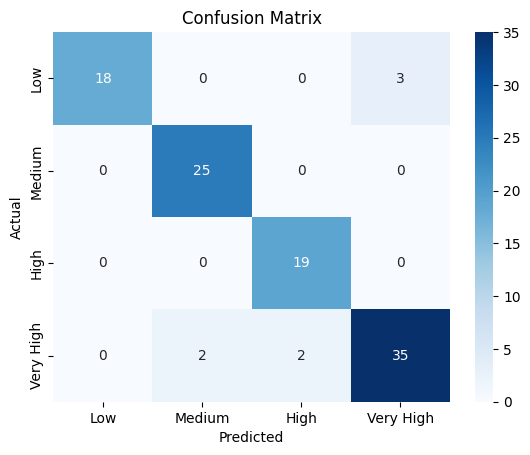

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        21
         1.0       0.93      1.00      0.96        25
         2.0       0.90      1.00      0.95        19
         3.0       0.92      0.90      0.91        39

    accuracy                           0.93       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.93      0.93       104



In [58]:
#5. Evaluasi Model CRISP-DM
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Tampilkan classification report
print(classification_report(y_test, y_pred))